<a href="https://colab.research.google.com/github/chaudhary-dotcom/PCA/blob/main/breast_cancer_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.sample(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
94,15.06,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,0.1855,0.06284,...,24.23,123.50,1025.0,0.1551,0.4203,0.5203,0.21150,0.2834,0.08234,0
43,13.28,20.28,87.32,545.2,0.10410,0.14360,0.09847,0.06158,0.1974,0.06782,...,28.00,113.10,907.2,0.1530,0.3724,0.3664,0.14920,0.3739,0.10270,0
540,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,...,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,1
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.11840,0.2651,0.07397,0
454,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,22.15,91.62,633.5,0.1225,0.1517,0.1887,0.09851,0.3270,0.07330,1


In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# EDA

In [7]:
df.shape

(569, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [9]:
df.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
mean_compactness,0
mean_concavity,0
mean_concave_points,0
mean_symmetry,0
mean_fractal_dimension,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes.value_counts()

,count
float64,30
int64,1


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean_texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean_perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean_area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean_smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean_compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean_concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean_concave_points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean_symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean_fractal_dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Text(0.5, 1.0, 'Distribution of target variable')

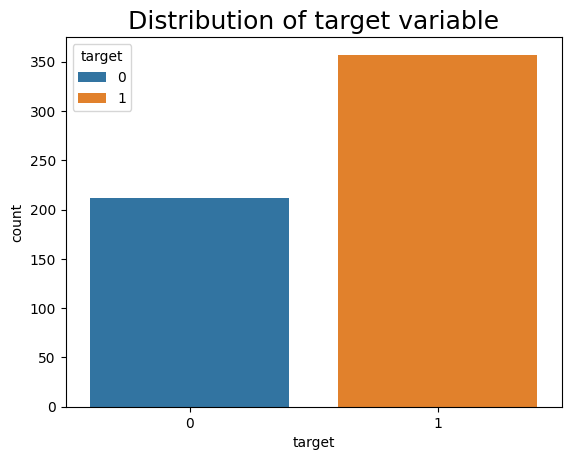

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df, hue='target')
plt.title('Distribution of target variable', fontsize=18)

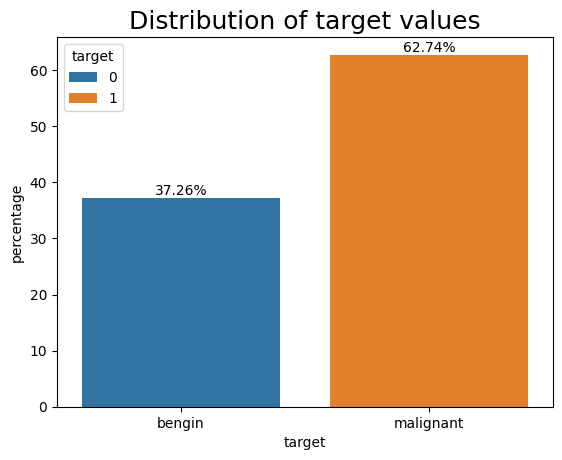

In [ ]:
value_counts_df = (round(df.target.value_counts(normalize=True)*100,2)).reset_index()
value_counts_df.columns = ['target', 'percentage']

ax = sns.barplot(x=value_counts_df['target'], y=value_counts_df['percentage'], hue=value_counts_df['target'], dodge=False)
ax.bar_label(ax.containers[0], fmt='%.2f%%')
ax.bar_label(ax.containers[1], fmt='%.2f%%')
plt.xticks(ticks=[0,1], labels=['bengin', 'malignant'])
plt.title('Distribution of target values', fontsize=18)
plt.show()
# value_counts_df

In [ ]:
# from scipy import stats
# num_cols = list(df.select_dtypes('float64').columns)
# unrelated_num_cols = []
# categorical_col = 'target'

# for i in num_cols:
#   grouped_data = [df[i][df[categorical_col]==category] for category in df[categorical_col].unique()]
#   statistics, p_value = stats.f_oneway(*grouped_data)

#   # Set the significance level
#   alpha = -


# PCA

In [15]:
X = df.copy().drop(columns='target')
y = df['target']


In [16]:
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
# Step 1: Standardizing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_trf = scaler.fit_transform(X)

In [19]:
# Step 2: Covariance
cov_matrix = np.cov(X_trf.T)
cov_matrix

array([[ 1.00176056e+00,  3.24351929e-01,  9.99612069e-01,
         9.89095475e-01,  1.70881506e-01,  5.07014640e-01,
         6.77955036e-01,  8.23976636e-01,  1.48001350e-01,
        -3.12179472e-01,  6.80285970e-01, -9.74887767e-02,
         6.75358538e-01,  7.37159198e-01, -2.22992026e-01,
         2.06362656e-01,  1.94545531e-01,  3.76831225e-01,
        -1.04504545e-01, -4.27163418e-02,  9.71245907e-01,
         2.97530545e-01,  9.66835698e-01,  9.42739295e-01,
         1.19826732e-01,  4.14190751e-01,  5.27839123e-01,
         7.45524434e-01,  1.64241985e-01,  7.07832563e-03],
       [ 3.24351929e-01,  1.00176056e+00,  3.30113223e-01,
         3.21650988e-01, -2.34296930e-02,  2.37118951e-01,
         3.02950254e-01,  2.93980713e-01,  7.15266864e-02,
        -7.65717560e-02,  2.76354360e-01,  3.87037830e-01,
         2.82169018e-01,  2.60302460e-01,  6.62542133e-03,
         1.92312595e-01,  1.43545353e-01,  1.64139495e-01,
         9.14323671e-03,  5.45533955e-02,  3.53193674e-

In [20]:
# Step 3: finding eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [30]:
# Step 4: Sort eigen values and eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]

# Sort eigen values and eigen vectors
eig_vals_sorted = eig_vals[sorted_indices]
eig_vecs_sorted = eig_vecs[:, sorted_indices]


In [35]:
# Select top k eigenvectors
k = 2
eig_vecs_subset = eig_vecs_sorted[:, :k]


# Using sklearn PCA

In [40]:
scaler = StandardScaler()

X_trf = scaler.fit_transform(X)


In [45]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_trf)

pca.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [48]:
pca.components_.shape

(30, 30)